### SEIS 763-01: Homework 4
#### Completed by: Jamie Boehme

**1.  Load the patient data from “ML_HW_Data_Patients.csv” file.**

Import libraries needed for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LassoCV, LassoLarsCV, Lasso
import plotly.graph_objects as go

Import file from Github.

In [2]:
file = 'https://raw.githubusercontent.com/jamieboehme/Machine-Learning/main/ML_HW_Data_Patients.csv'
patient = pd.read_csv(file)
patient.head()

,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight
0,38,93,'Male',71,'Smith','County General Hospital','Excellent',1,124,176
1,43,77,'Male',69,'Johnson','VA Hospital','Fair',0,109,163
2,38,83,'Female',64,'Williams','St. Mary's Medical Center','Good',0,125,131
3,40,75,'Female',67,'Jones','VA Hospital','Fair',0,117,133
4,49,80,'Female',64,'Brown','County General Hospital','Good',0,122,119


**2. Use variables Age, Gender, Height, Weight, Smoker, Location, Self Assessed HealthStatus to build a linear regression model to predict the systolic blood pressure.**

Do some exploratory analysis of the dataset including: reviewing number of columns and rows, data types, and overall shape of each column. Determine if there appear to be any obvious outliers. Check if there are any null values that will need to be taken care of prior to building a linear regression model.

In [3]:
patient.shape

(100, 10)

In [4]:
patient.dtypes

Age                          int64
Diastolic                    int64
Gender                      object
Height                       int64
LastName                    object
Location                    object
SelfAssessedHealthStatus    object
Smoker                       int64
Systolic                     int64
Weight                       int64
dtype: object

In [5]:
patient.describe()

,Age,Diastolic,Height,Smoker,Systolic,Weight
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,38.280000,82.960000,67.070000,0.340000,122.78000,154.000000
std,7.215416,6.932459,2.836469,0.476095,6.71284,26.571421
min,25.000000,68.000000,60.000000,0.000000,109.00000,111.000000
25%,32.000000,77.750000,65.000000,0.000000,117.75000,130.750000
50%,39.000000,81.500000,67.000000,0.000000,122.00000,142.500000
75%,44.000000,89.000000,69.250000,1.000000,127.25000,180.250000
max,50.000000,99.000000,72.000000,1.000000,138.00000,202.000000


In [6]:
patient.describe(include =object)

,Gender,LastName,Location,SelfAssessedHealthStatus
count,100,100,100,100
unique,2,100,3,4
top,'Female','Smith','County General Hospital','Good'
freq,53,1,39,40


In [7]:
patient.isnull().sum()

Age                         0
Diastolic                   0
Gender                      0
Height                      0
LastName                    0
Location                    0
SelfAssessedHealthStatus    0
Smoker                      0
Systolic                    0
Weight                      0
dtype: int64

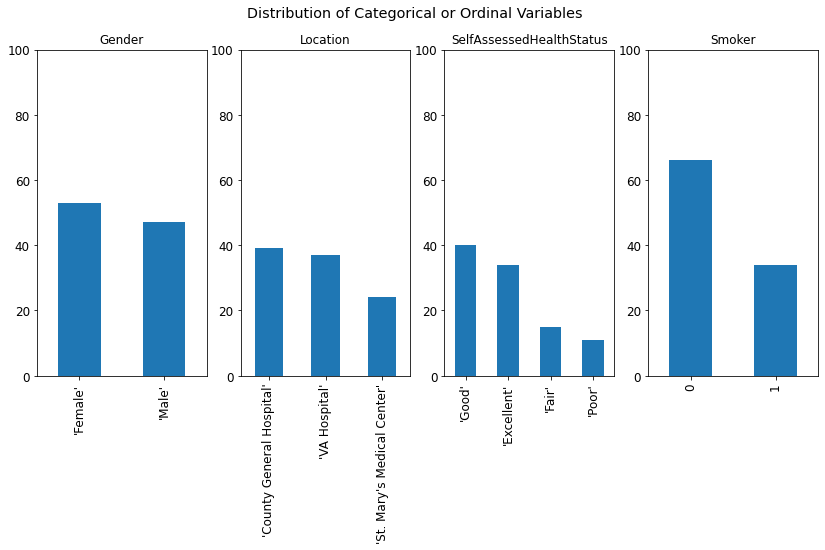

In [8]:
colors = ['mediumturquoise', 'blueviolet', 'mediumvioletred', 'palegreen']
small_size= 12
mp.rc('font', size=small_size)
mp.rc('axes', titlesize=small_size)

def graph_cat(cat_variable):
    values = patient[cat_variable].value_counts(normalize=True)
    percent = values * 100
    return percent.plot.bar(title = cat_variable, ylim=(0,100))

def cross_graph(tabular_num):
    var = pd.crosstab(patient[tabular_num], patient['Systolic'])
    graph = var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, 
                                                             title = '{} vs Current Condition'.format(tabular_num))
    return graph

catagorical_var = ['Gender', 'Location', 'SelfAssessedHealthStatus', 'Smoker']

fig1 = plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Categorical or Ordinal Variables')

plotnum=1
for cat_var in catagorical_var:
    plt.subplot(1,4,plotnum)
    graph_cat(cat_var)
    plotnum +=1
plt.show()

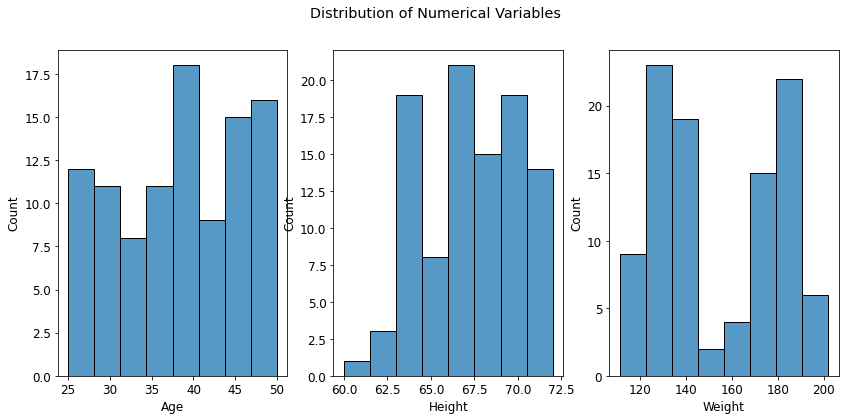

In [9]:
def graph_num(num_variable):
    sns.histplot(patient[num_variable])
    
numeric_var = ['Age', 'Height', 'Weight'] 

plot_num = plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Numerical Variables')

plotnum=1
for num_var in numeric_var:
    plt.subplot(1,3,plotnum)
    graph_num(num_var)
    plotnum +=1
plt.show()

Remove 'LastName' from dataset, as name has no bearing on Systolic, and in industry, represents PII data that should not be used for the basis of modeling. Remove 'Diastolic' from dataset as this was not part of the assignment.

In [10]:
patient = patient.drop(['LastName','Diastolic'], axis=1)

In [11]:
patient.shape

(100, 8)

Seperate numerical variables and standardize them for the purposes of modeling.

In [12]:
num_columns = patient[numeric_var]
num_df = num_columns.copy()
print(num_df)

    Age  Height  Weight
0    38      71     176
1    43      69     163
2    38      64     131
3    40      67     133
4    49      64     119
..  ...     ...     ...
95   25      69     171
96   44      69     188
97   49      70     186
98   45      68     172
99   48      66     177

[100 rows x 3 columns]


In [13]:
ZX= preprocessing.scale(num_columns)
num_df_clean = pd.DataFrame(ZX, columns = numeric_var)
print(num_df_clean, '\n')
print(num_df_clean.mean(axis=0), 
num_df_clean.std(axis=0))

         Age    Height    Weight
0  -0.039001  1.392506  0.832128
1   0.657450  0.683851  0.340416
2  -0.039001 -1.087784 -0.869952
3   0.239579 -0.024803 -0.794304
4   1.493193 -1.087784 -1.323841
..       ...       ...       ...
95 -1.849776  0.683851  0.643008
96  0.796741  0.683851  1.286017
97  1.493193  1.038178  1.210368
98  0.936031  0.329524  0.680832
99  1.353902 -0.379130  0.869952

[100 rows x 3 columns] 

Age      -1.576517e-16
Height    2.456924e-15
Weight   -1.221245e-17
dtype: float64 Age       1.005038
Height    1.005038
Weight    1.005038
dtype: float64


Perform One-Hot Encoding on dataframe for categorical variables for the purposes of data modeling.

In [14]:
catagorical_var = ['Gender', 'Location', 'SelfAssessedHealthStatus']
cat_columns = patient[catagorical_var]
cat_df = cat_columns.copy()
print(cat_df)

      Gender                     Location SelfAssessedHealthStatus
0     'Male'    'County General Hospital'              'Excellent'
1     'Male'                'VA Hospital'                   'Fair'
2   'Female'  'St. Mary's Medical Center'                   'Good'
3   'Female'                'VA Hospital'                   'Fair'
4   'Female'    'County General Hospital'                   'Good'
..       ...                          ...                      ...
95    'Male'    'County General Hospital'                   'Good'
96    'Male'                'VA Hospital'                   'Good'
97    'Male'    'County General Hospital'                   'Fair'
98    'Male'    'County General Hospital'                   'Good'
99    'Male'    'County General Hospital'                   'Fair'

[100 rows x 3 columns]


In [15]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

enc = OneHotEncoder()
new_cat = enc.fit_transform(cat_df)

In [16]:
new_cat

,Gender_'Female',Gender_'Male',Location_'County General Hospital',Location_'St. Mary's Medical Center',Location_'VA Hospital',SelfAssessedHealthStatus_'Excellent',SelfAssessedHealthStatus_'Fair',SelfAssessedHealthStatus_'Good',SelfAssessedHealthStatus_'Poor'
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
95,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
96,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
97,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
98,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
new_cat.dtypes

Gender_'Female'                         float64
Gender_'Male'                           float64
Location_'County General Hospital'      float64
Location_'St. Mary's Medical Center'    float64
Location_'VA Hospital'                  float64
SelfAssessedHealthStatus_'Excellent'    float64
SelfAssessedHealthStatus_'Fair'         float64
SelfAssessedHealthStatus_'Good'         float64
SelfAssessedHealthStatus_'Poor'         float64
dtype: object

Drop one-hot encoded columns that are already represented in the dataframe.

In [18]:
cat_df_clean = new_cat.iloc[:,[0,2,3,5,6,7]]

In [19]:
cat_df_clean

,Gender_'Female',Location_'County General Hospital',Location_'St. Mary's Medical Center',SelfAssessedHealthStatus_'Excellent',SelfAssessedHealthStatus_'Fair',SelfAssessedHealthStatus_'Good'
0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
95,0.0,1.0,0.0,0.0,0.0,1.0
96,0.0,0.0,0.0,0.0,0.0,1.0
97,0.0,1.0,0.0,0.0,1.0,0.0
98,0.0,1.0,0.0,0.0,0.0,1.0


Seperate target variable, Systolic, from the current dataframe for modeling purposes.

In [20]:
Y = patient[['Systolic']]
Y

,Systolic
0,124
1,109
2,125
3,117
4,122
...,...
95,128
96,124
97,119
98,136


Combine all pre-processed columns to be used in linear regression model.

In [21]:
smoking = patient.iloc[:,5]

In [22]:
X = pd.concat([num_df_clean, cat_df_clean, smoking], axis=1)

In [23]:
print(X)

         Age    Height    Weight  Gender_'Female'  \
0  -0.039001  1.392506  0.832128              0.0   
1   0.657450  0.683851  0.340416              0.0   
2  -0.039001 -1.087784 -0.869952              1.0   
3   0.239579 -0.024803 -0.794304              1.0   
4   1.493193 -1.087784 -1.323841              1.0   
..       ...       ...       ...              ...   
95 -1.849776  0.683851  0.643008              0.0   
96  0.796741  0.683851  1.286017              0.0   
97  1.493193  1.038178  1.210368              0.0   
98  0.936031  0.329524  0.680832              0.0   
99  1.353902 -0.379130  0.869952              0.0   

    Location_'County General Hospital'  Location_'St. Mary's Medical Center'  \
0                                  1.0                                   0.0   
1                                  0.0                                   0.0   
2                                  0.0                                   1.0   
3                                  0.0     

**2. Use variables Age, Gender, Height, Weight, Smoker, Location, SelfAssessedHealthStatus to perform linear regression model via Lasso and Lasso Lars on train and testing datasets. Lasso automatically performs alpha testing from 0 to 1, however Lasso Lars, steps through different lambdas allowing us to understand how coefficients are changing.**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1234)

**3. Use lasso regression with 10-fold cross-validation to identify useful predictors.**

In [25]:
lasso_cv = LassoCV(cv=10)
lasso_cv_fit = lasso_cv.fit(x_train,y_train.values.ravel())

In [26]:
print('Lasso Scores:')
print('Train ', lasso_cv.score(x_train, y_train.values.ravel()))
print('Test', lasso_cv.score(x_test, y_test))

Lasso Scores:
Train  0.5281660549396197
Test 0.35367798009594387


In [27]:
lasso_lars = LassoLarsCV(cv=10,normalize=False)
lasso_lars_fit = lasso_lars.fit(x_train, y_train.values.ravel())

In [28]:
print('\nLasso Lars Scores')
print('Train ', lasso_lars.score(x_train, y_train.values.ravel()))
print('Test', lasso_lars.score(x_test,y_test))


Lasso Lars Scores
Train  0.5260758424687588
Test 0.35317131041652794


In [29]:
print("Thetas and best selected alphas are very similar between Lasso and Lasso Lars")
print(f"LassoCV alpha:     {lasso_cv_fit.alpha_}")
print(f"LassoLarsCV alpha: {lasso_lars_fit.alpha_}")

Thetas and best selected alphas are very similar between Lasso and Lasso Lars
LassoCV alpha:     0.42793305394574066
LassoLarsCV alpha: 0.4462278423535185


In [30]:
m_log_alphas_lars = -np.log10(lasso_lars.alphas_)
print("Alpha or lambda, amount of regularization\n",m_log_alphas_lars)
print("\nCoefficients over different regularization\n",lasso_lars.coef_path_.T) 

Alpha or lambda, amount of regularization
 [-0.35864856  0.0027412   0.2691967   0.35044334]

Coefficients over different regularization
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         5.88053317]
 [0.         0.27003346 0.         0.         0.         0.
  0.         0.         0.         7.85004178]
 [0.08569127 0.31710174 0.         0.         0.         0.
  0.         0.         0.         8.24697245]]


In [31]:
coeffs = lasso_lars_fit.coef_  
coeffs_intercept = lasso_lars_fit.intercept_   
print("Coefficients after lasso model:\n",coeffs)
print("\nCoefficient order\n", X.columns)
print("\nIntercept of model after lasso:\n",coeffs_intercept)
print("\nCoefficients reduced by lasso:\n",np.array(X.columns)[coeffs==0])
print("\nCoefficients still relevant after lasso:\n",np.array(X.columns)[coeffs>0])

Coefficients after lasso model:
 [0.08569127 0.31710174 0.         0.         0.         0.
 0.         0.         0.         8.24697245]

Coefficient order
 Index(['Age', 'Height', 'Weight', 'Gender_'Female'',
       'Location_'County General Hospital'',
       'Location_'St. Mary's Medical Center'',
       'SelfAssessedHealthStatus_'Excellent'',
       'SelfAssessedHealthStatus_'Fair'', 'SelfAssessedHealthStatus_'Good'',
       'Smoker'],
      dtype='object')

Intercept of model after lasso:
 119.86600115116322

Coefficients reduced by lasso:
 ['Weight' "Gender_'Female'" "Location_'County General Hospital'"
 "Location_'St. Mary's Medical Center'"
 "SelfAssessedHealthStatus_'Excellent'" "SelfAssessedHealthStatus_'Fair'"
 "SelfAssessedHealthStatus_'Good'"]

Coefficients still relevant after lasso:
 ['Age' 'Height' 'Smoker']


**4. Which top **TWO** predictors are you going to select after the lasso analysis?**

If I had to choose only two predictors following Lasso analysis, though Lasso showed that three predictors may be better, I would choose Smoker and Height.

**5. What is the lambda (l) value you choose in order to select the top two predictors
you identified in the last question?**

The lambda I would choose to select only the top two predictors would be a lambda/alpha equal to 0.2691967, shown by the processing above to display amount of regularization vs the coefficients over different regularization. 

**6. What are the theta values for the two selected predictors at the lambda (l) value you
identified in the last question?**

The theta values for Smoker and Height are:
- Smoker:  7.85004178]
- Height: 0.27003346

**7. Plot a lasso plot with (more difficult in Python; hence optional)**

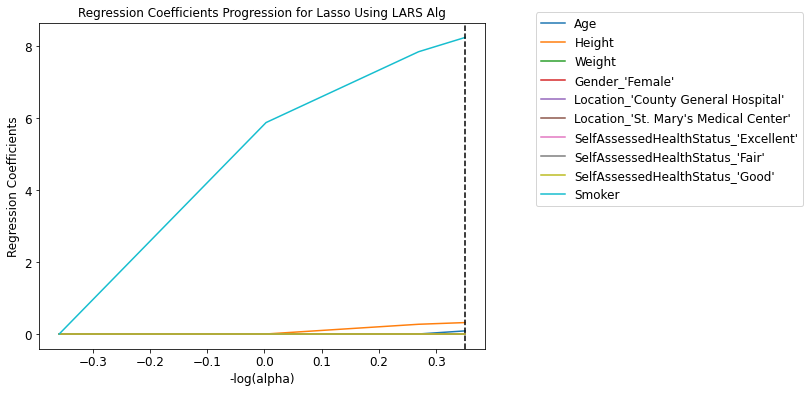

In [32]:
# plot coefficient progression lasso lars
m_log_alphas_lars = -np.log10(lasso_lars.alphas_)
figure(figsize=(8, 6))
ax = plt.gca()
plt.plot(m_log_alphas_lars, lasso_lars.coef_path_.T)
plt.axvline(-np.log10(lasso_lars.alpha_), linestyle='--', color='k', label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.legend(x_train.columns, bbox_to_anchor=(1.1, 1.05))
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Using LARS Alg')
plt.show()

This visually shows the most important alphas found via Lasso: Smoker, Height, and Age.

/var/folders/v0/gj8zrcyx3_n12_t5m6y47bk80000gn/T/ipykernel_6835/1274285920.py:2: RuntimeWarning: divide by zero encountered in log10
  m_log_alphascv_lars = -np.log10(lasso_lars.cv_alphas_)


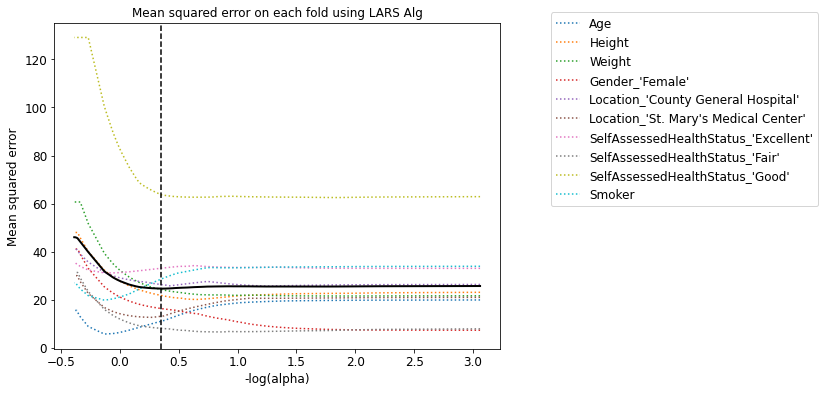

In [33]:
# plot MSE for each fold lasso lars
m_log_alphascv_lars = -np.log10(lasso_lars.cv_alphas_)
figure(figsize=(8, 6))
plt.plot(m_log_alphascv_lars, lasso_lars.mse_path_, ':')
plt.plot(m_log_alphascv_lars, lasso_lars.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso_lars.alpha_), linestyle='--', color='k', label='alpha CV')
plt.legend(x_train.columns, bbox_to_anchor=(1.1, 1.05))
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold using LARS Alg')
plt.show()

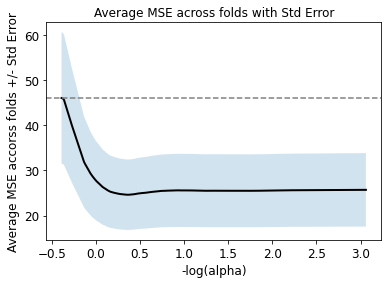

In [34]:
# plot average MSE with std error range lasso

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(m_log_alphascv_lars, lasso_lars.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
error = lasso_lars.mse_path_.mean(axis=1) / np.sqrt(10)

ax.fill_between(m_log_alphascv_lars, lasso_lars.mse_path_.mean(axis=1) + error, lasso_lars.mse_path_.mean(axis=1) - error, alpha=0.2)
ax.set_ylabel('Average MSE accorss folds +/- Std Error')
ax.set_xlabel('-log(alpha)')
ax.set_title('Average MSE across folds with Std Error')
ax.axhline(np.max(lasso_lars.mse_path_.mean(axis=1)), linestyle='--', color='.5')
plt.show()

The visual representation of MSE is 'typical' to what we would see in Lasso Regression models, which is a good sign that the model was done correctly.